<a href="https://colab.research.google.com/github/apchavezr/18.-Modelado-y-simulaci-n/blob/main/modelo_continuo_tanque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Continuo: Nivel de Agua en un Tanque

Este notebook presenta un ejemplo práctico de simulación continua de un sistema físico: un tanque que recibe agua a un caudal constante y cuya salida es proporcional al nivel de agua, de acuerdo con la ley de Torricelli.

Se resuelve una ecuación diferencial ordinaria (ODE) que describe el cambio en el nivel de agua en función del tiempo, utilizando el método de Runge-Kutta (RK45) a través de `scipy.integrate.solve_ivp`.

In [1]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Definición del sistema

La ecuación diferencial que modela el sistema es:

$\frac{dh}{dt} = \frac{Q_{in} - k \cdot h}{A}$

donde:
- `Q_in` es el caudal de entrada constante (litros/min),
- `k` es la constante de proporcionalidad de salida (min⁻¹),
- `A` es el área del tanque (m²),
- `h` es el nivel de agua en el tanque (m).

In [2]:
# Parámetros del sistema
Q_in = 2.0   # Entrada de agua (litros/min)
k = 0.1      # Constante de salida
A = 5.0      # Área del tanque (m^2)

# Definición de la ODE
def modelo_tanque(t, h):
    return (Q_in - k * h) / A

In [3]:
# Condiciones iniciales y configuración del intervalo de simulación
h0 = [0.0]  # Nivel inicial (m)
t_span = (0, 120)  # Intervalo de tiempo (min)
t_eval = np.linspace(*t_span, 300)  # Puntos de evaluación

# Resolver la ODE
sol = solve_ivp(modelo_tanque, t_span, h0, t_eval=t_eval, method='RK45')

## Visualización de resultados

Se grafica la evolución del nivel de agua con el tiempo y se compara con el valor estacionario teórico \( h = Q_{in}/k = 20 \) m.

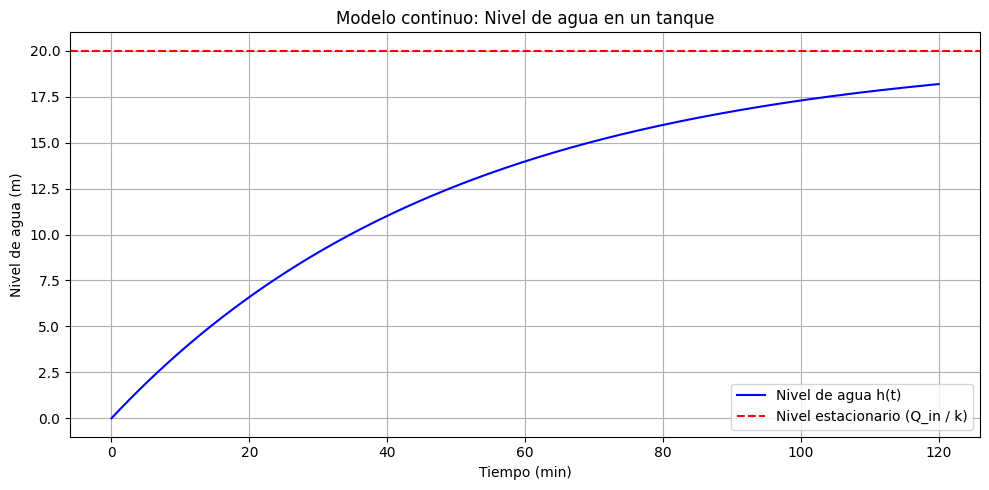

In [4]:
# Gráfico del nivel de agua
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='Nivel de agua h(t)', color='blue')
plt.axhline(Q_in/k, color='red', linestyle='--', label='Nivel estacionario (Q_in / k)')
plt.title('Modelo continuo: Nivel de agua en un tanque')
plt.xlabel('Tiempo (min)')
plt.ylabel('Nivel de agua (m)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###  Conclusiones del modelo continuo del nivel de agua en un tanque

1. **Estabilización dinámica del sistema**:
   La simulación muestra que el nivel de agua en el tanque aumenta gradualmente desde un valor inicial de cero hasta alcanzar un nivel constante. Esta estabilización ocurre cuando la tasa de entrada iguala la tasa de salida ($Q_{in} = k \cdot h$), lo cual confirma el comportamiento esperado de un sistema dinámico de primer orden.

2. **Comportamiento suave y continuo**:
   A diferencia de los modelos discretos que presentan saltos abruptos, el cambio de estado en este modelo es suave y continuo en el tiempo. Esto lo hace apropiado para representar fenómenos físicos donde no hay eventos súbitos, como procesos térmicos, hidráulicos o químicos.

3. **Importancia del equilibrio**:
   La simulación valida que el sistema converge hacia un valor estacionario teórico $h = Q_{in} / k = 20$ metros. Esta propiedad es clave en el diseño de sistemas de control y regulación, donde se busca que el sistema mantenga un comportamiento estable frente a entradas constantes.

4. **Aplicación de métodos numéricos**:
   La resolución del modelo mediante el método de Runge-Kutta (RK45) permitió obtener una solución precisa y eficiente. Este enfoque demuestra la relevancia del análisis numérico en contextos donde no se dispone de soluciones analíticas.

5. **Transferencia a contextos reales**:
   Este tipo de modelado es directamente aplicable a contextos como plantas de tratamiento de agua, tanques de almacenamiento industrial, o sistemas de irrigación. Además, permite validar el diseño de sensores y actuadores que intervienen en el monitoreo del sistema.

